In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
plt.rc('axes', labelsize = 12, labelpad = 5)

Importing data and data cleaning

In [48]:
df = pd.read_csv('insurance.csv')

Looking at a sample of our data it looks like we have 4 numerical features two categorical features and 1 boolean feature.  
Our dependent variable in which we will want to predict is "charges". 

In [49]:
df.sample(5, random_state=12)

,age,sex,bmi,children,smoker,region,charges
936,44,male,29.735,2,no,northeast,32108.66282
728,18,female,40.280,0,no,northeast,2217.60120
1307,32,male,28.120,4,yes,northwest,21472.47880
924,43,male,23.200,0,no,southwest,6250.43500
137,22,male,25.175,0,no,northwest,2045.68525


First checking data consistency and format

In [50]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [51]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [52]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [53]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

It looks like our "sex" and "region" features only have a few unique values, we can convert these columns to categorical datatypes for easier analysis. Our 'children' column also only ranges from 1 to 5 so we can treat this as a categorial feature as well.

In [54]:
for col in ['region', 'sex', 'children', 'smoker']:
    df[col] = df[col].astype('category')

In [55]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values in this dataset so we don't need to worry about imputation

## EDA

Let's begin our EDA by first analyzing our numerical features, age and bmi

#### Age

In [56]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Q-Q plot')

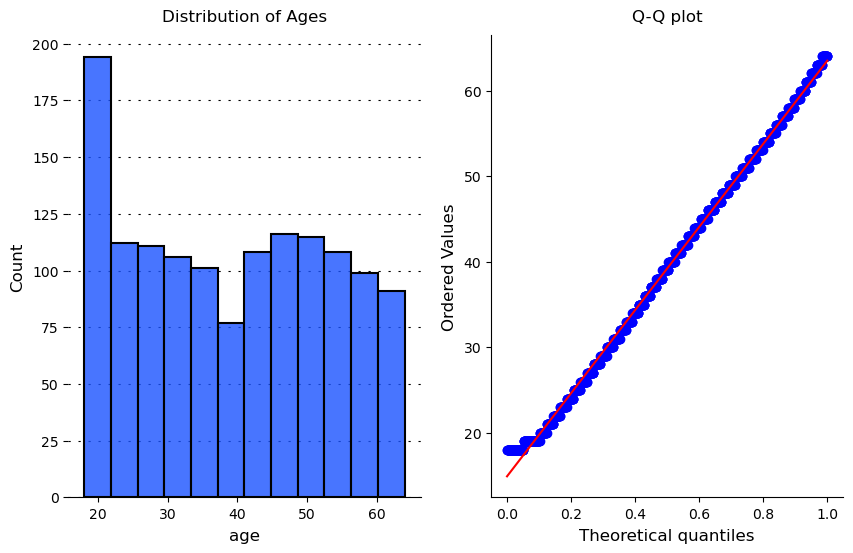

In [57]:
fig = plt.figure(figsize = (10,6), facecolor='white')
gs = fig.add_gridspec(1,2)
ax = [None for i in range(2)]
ax[0] = fig.add_subplot(gs[0,0])
ax[1] = fig.add_subplot(gs[0,1])

sns.histplot(
    data = df,
    x = 'age',
    ax = ax[0],
    edgecolor = 'black',
    linewidth = 1.5,
    alpha = 0.8,
    zorder = 2,
    color = ['#1a53ff']
)

stats.probplot(df['age'], dist = 'uniform', plot = ax[1])

ax[0].grid(
    which = 'both',
    axis = 'y',
    zorder = 1,
    color = 'black',
    linestyle = '-',
    dashes = (2,7)
)

for direction in ['top', 'left', 'right']:
    ax[0].spines[direction].set_visible(False)

for direction in ['top', 'right']:
    ax[1].spines[direction].set_visible(False)

ax[0].set_title('Distribution of Ages', pad = 10)
ax[1].set_title('Q-Q plot', pad = 10)


Our age distribution is relatively uniform and non-normal, we have a peak around 20 years old and a mean age of ~40  
A quantile-quantile plot of our age distribution shows that this data behaves very similarly to uniformally distributed data.

Text(0.5, 0, 'Age')

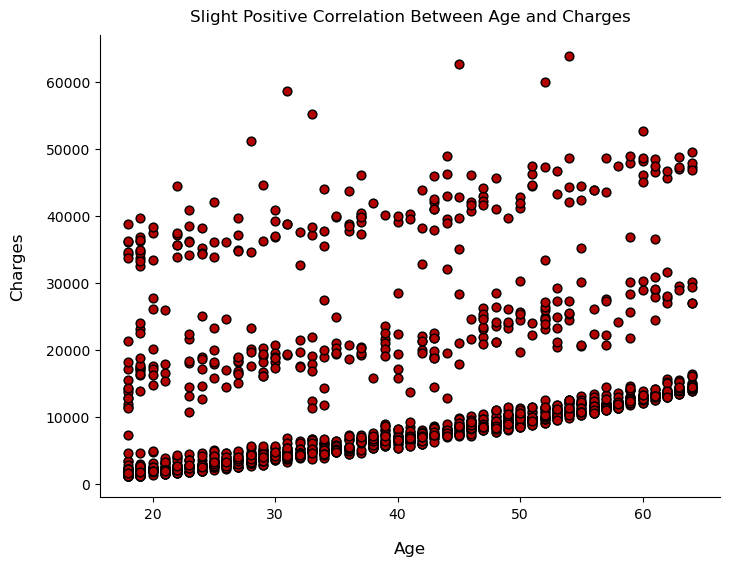

In [58]:
fig = plt.figure(figsize = (8,6))

ax = sns.scatterplot(
    x = df['age'],
    y = df['charges'],
    s = 40,
    edgecolor = 'black',
    linewidth = 1,
    c = ['#b30000']
)

for direction in ['top', 'right']:
    ax.spines[direction].set_visible(False)

ax.set_title('Slight Positive Correlation Between Age and Charges', pad = 10)
ax.set_ylabel('Charges', labelpad = 15)
ax.set_xlabel('Age', labelpad = 15)

There is a slight positive correlation between the mininum amount of charges and the age of our population, however the is still quite a bit of variabity in this relationship above the minimun charges.

### BMI

In [59]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Text(0.5, 1.0, 'Q-Q plot')

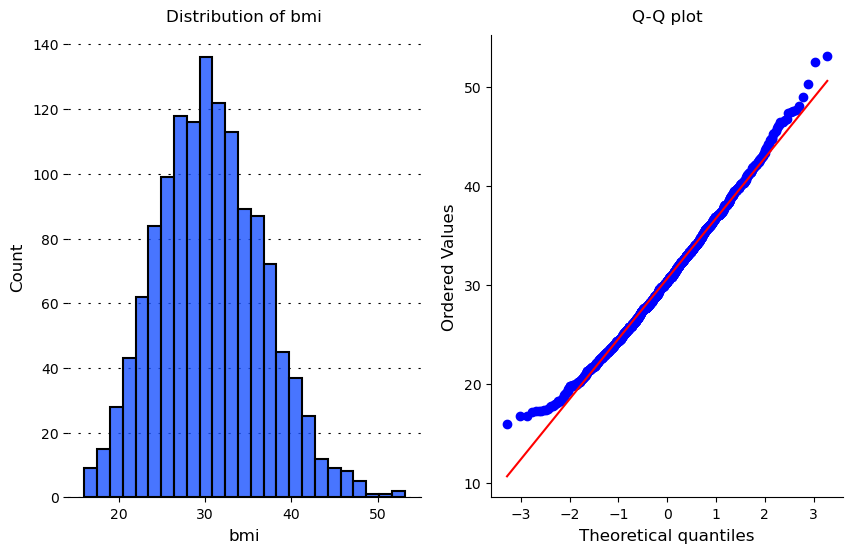

In [60]:
fig = plt.figure(figsize = (10,6), facecolor='white')
gs = fig.add_gridspec(1,2)
ax = [None for i in range(2)]
ax[0] = fig.add_subplot(gs[0,0])
ax[1] = fig.add_subplot(gs[0,1])

sns.histplot(
    data = df,
    x = 'bmi',
    ax = ax[0],
    edgecolor = 'black',
    linewidth = 1.5,
    alpha = 0.8,
    zorder = 2,
    color = ['#1a53ff']
)

stats.probplot(df['bmi'], dist = 'norm', plot = ax[1])

ax[0].grid(
    which = 'both',
    axis = 'y',
    zorder = 1,
    color = 'black',
    linestyle = '-',
    dashes = (2,7)
)

for direction in ['top', 'left', 'right']:
    ax[0].spines[direction].set_visible(False)

for direction in ['top', 'right']:
    ax[1].spines[direction].set_visible(False)

ax[0].set_title('Distribution of bmi', pad = 10)
ax[1].set_title('Q-Q plot', pad = 10)

We observe that our bmi feature is much more normally distributed, with a slight right skew.  
We have an average bmi of 30 and a slight deviation from a normal distribution at the tails.

We could transform this feature using a box-cox transformation to shift our distribution towards normal

In [61]:
transformed_bmi, lambda_bmi = stats.boxcox(df['bmi'])

In [62]:
print('box-cox lambda value:', lambda_bmi)

box-cox lambda value: 0.46059764800652364


Text(0.5, 0, 'BMI (transformed)')

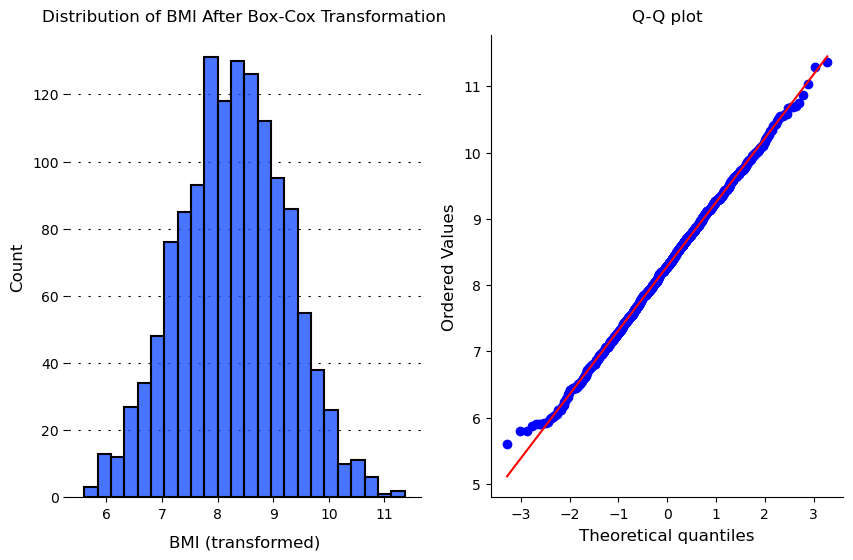

In [63]:
fig = plt.figure(figsize = (10,6), facecolor='white')
gs = fig.add_gridspec(1,2)
ax = [None for i in range(2)]
ax[0] = fig.add_subplot(gs[0,0])
ax[1] = fig.add_subplot(gs[0,1])

sns.histplot(
    x = transformed_bmi,
    ax = ax[0],
    edgecolor = 'black',
    linewidth = 1.5,
    alpha = 0.8,
    zorder = 2,
    color = ['#1a53ff']
)

stats.probplot(transformed_bmi, dist = 'norm', plot = ax[1])

ax[0].grid(
    which = 'both',
    axis = 'y',
    zorder = 1,
    color = 'black',
    linestyle = '-',
    dashes = (2,7)
)

for direction in ['top', 'left', 'right']:
    ax[0].spines[direction].set_visible(False)

for direction in ['top', 'right']:
    ax[1].spines[direction].set_visible(False)

ax[0].set_title('Distribution of BMI After Box-Cox Transformation', pad = 10)
ax[1].set_title('Q-Q plot', pad = 10)

ax[0].set_xlabel('BMI (transformed)', labelpad = 10)

After our Box-Cox transformation the distribution of our BMI values is much more normalized.  
We may want to include this tranformation when building our linear model

adding the transformed bmi feature to our dataframe

In [64]:
df['bmi_transformed'] = df['bmi']**lambda_bmi

In [65]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_transformed
0,19,female,27.900,0,yes,southwest,16884.92400,4.632782
1,18,male,33.770,1,no,southeast,1725.55230,5.058687
2,28,male,33.000,3,no,southeast,4449.46200,5.005229
3,33,male,22.705,0,no,northwest,21984.47061,4.213339
4,32,male,28.880,0,no,northwest,3866.85520,4.707037


Text(0.5, 0, 'BMI')

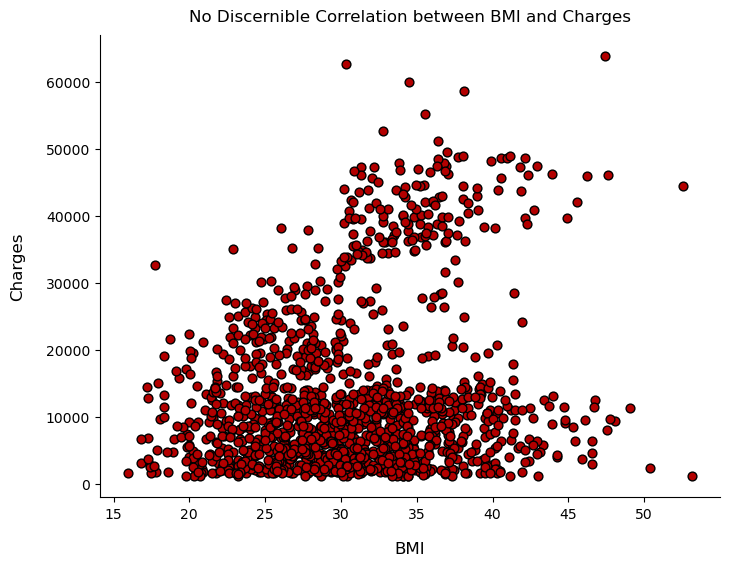

In [66]:
fig = plt.figure(figsize = (8,6))

ax = sns.scatterplot(
    x = df['bmi'],
    y = df['charges'],
    s = 40,
    edgecolor = 'black',
    linewidth = 1,
    c = ['#b30000']
)

for direction in ['top', 'right']:
    ax.spines[direction].set_visible(False)

ax.set_title('No Discernible Correlation between BMI and Charges', pad = 10)
ax.set_ylabel('Charges', labelpad = 15)
ax.set_xlabel('BMI', labelpad = 15)

There doesn't seem to be an obvious correlation between BMI and charges.  
However we can make out some clusters in our data, lets add in some of our other features.  
Smoking typically comes with negative impacts on health (possible higher charges). Lets include this in our graph

Text(0.5, 0, 'BMI')

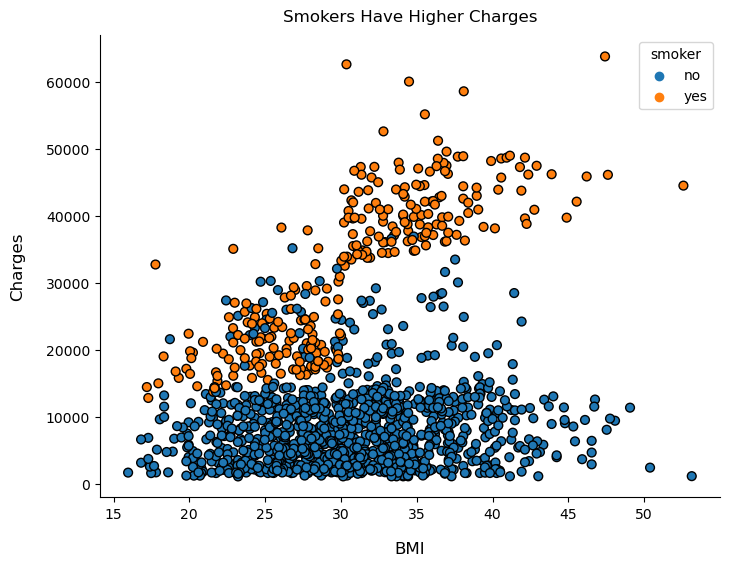

In [67]:
fig = plt.figure(figsize = (8,6))

ax = sns.scatterplot(
    x = df['bmi'],
    y = df['charges'],
    s = 40,
    edgecolor = 'black',
    linewidth = 1,
    hue = df['smoker']
)

for direction in ['top', 'right']:
    ax.spines[direction].set_visible(False)

ax.set_title('Smokers Have Higher Charges', pad = 10)
ax.set_ylabel('Charges', labelpad = 15)
ax.set_xlabel('BMI', labelpad = 15)

We can observe that smoking seems to correlate with higher charges. We can also observe possible interaction terms between smoking and BMI

### Exploring our categorical features

#### Sex

In [68]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

We have an equal distribution between male and female patients in our dataset

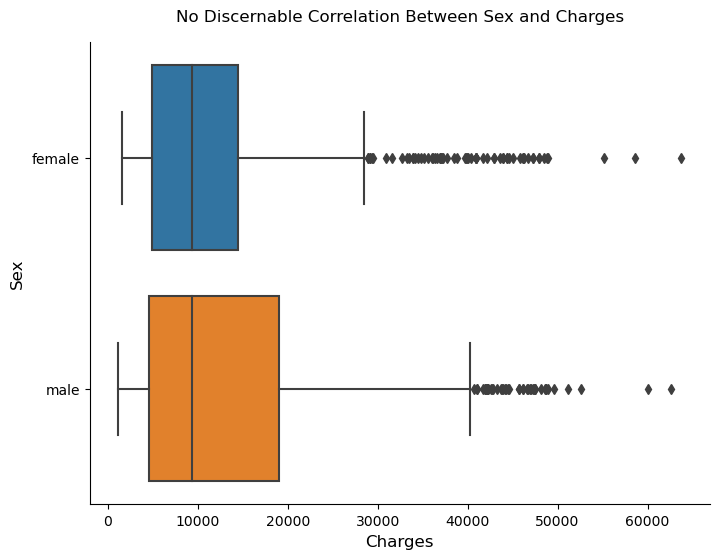

In [69]:
fig = plt.figure(figsize = (8,6))
ax = sns.boxplot(
    data = df,
    y = 'sex',
    x = 'charges'
)

ax.set_title('No Discernable Correlation Between Sex and Charges', pad = 15)
ax.set_ylabel('Sex')
ax.set_xlabel('Charges')

for dir in ['top','right']:
    ax.spines[dir].set_visible(False)

It seems like sex may not have much impact on our model if we include it. Male patients tend to have a wider range of charges, however the quartile values are very similar between the two with the only difference being male has a higher 75% quartile.  
I don't think adding this feature into our model will make much of an impact unless there are some interaction terms with other features we can find

#### Children

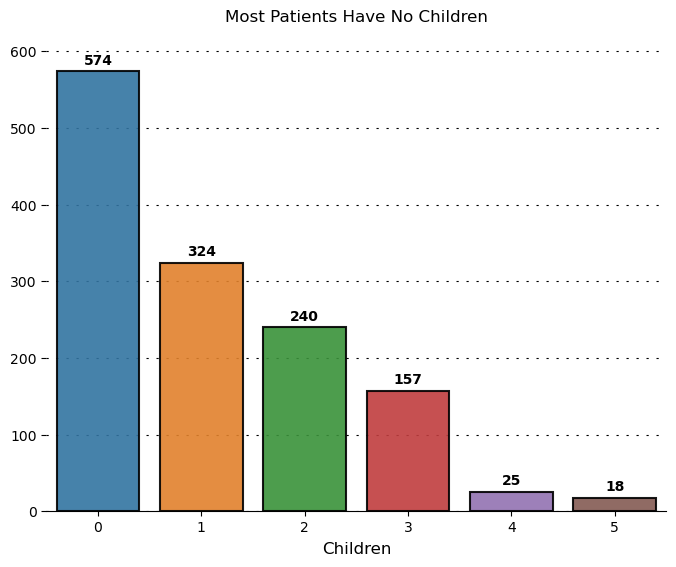

In [70]:
fig = plt.figure(figsize = (8,6))
ax = sns.countplot(
    data = df,
    x = 'children',
    edgecolor = 'black',
    linewidth = 1.5,
    alpha = 0.9,
    zorder = 2
)

for dir in ['top', 'left', 'right']:
    ax.spines[dir].set_visible(False)

ax.grid(
    which = 'both',
    axis = 'y',
    zorder = 1,
    color = 'black',
    linestyle = '-',
    dashes = (2,7)
)

ax.set_ylabel(None)
ax.set_xlabel('Children')
ax.set_title('Most Patients Have No Children', pad = 20)

ax.bar_label(ax.containers[0], fontweight = 'bold', padding = 3)
plt.show()

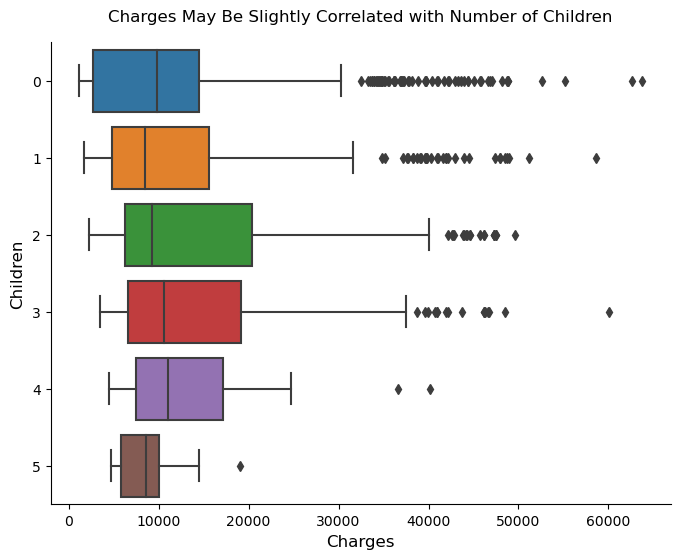

In [71]:
fig = plt.figure(figsize = (8,6))
ax = sns.boxplot(
    data = df,
    y = 'children',
    x = 'charges'
)

ax.set_title('Charges May Be Slightly Correlated with Number of Children', pad = 15)
ax.set_ylabel('Children')
ax.set_xlabel('Charges')

for dir in ['top','right']:
    ax.spines[dir].set_visible(False)

We can see there are some slight correlations with the number of children and charges. As the humber of children increase it appears that charges may also increase, however observing the median charges for each category of children we see this relationship isn't very strong.  

A better visualzition for this would be a swarmplot that shows the density of patients for each category.

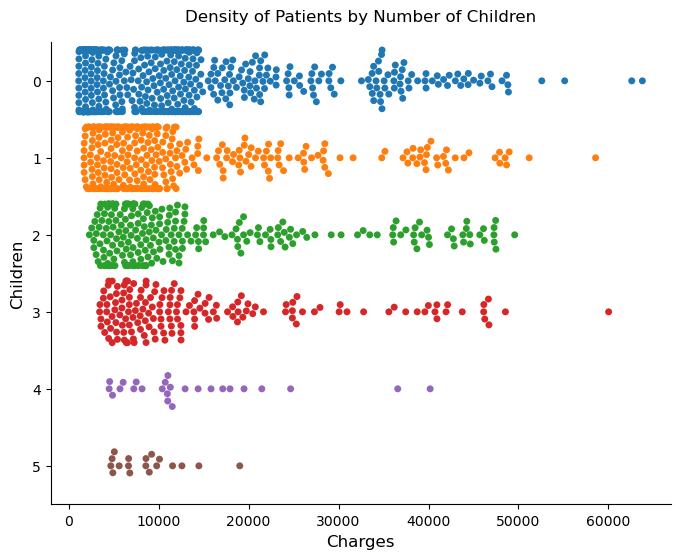

In [72]:
fig = plt.figure(figsize = (8,6))
ax = sns.swarmplot(
    data = df,
    y = 'children',
    x = 'charges'
)

ax.set_title('Density of Patients by Number of Children', pad = 15)
ax.set_ylabel('Children')
ax.set_xlabel('Charges')

for dir in ['top','right']:
    ax.spines[dir].set_visible(False)

We can observe here that the density of patients is very similar across each catergory of number of children and the correlation between charges and children may be minimal.  
However we can see that the lowest amount of charges for each catergory seems to be increasing with the number of children. This can help us predict the "floor" for charges.

Lets see if there may be any interaction terms with age and number of children

Text(0.5, 0, 'BMI')

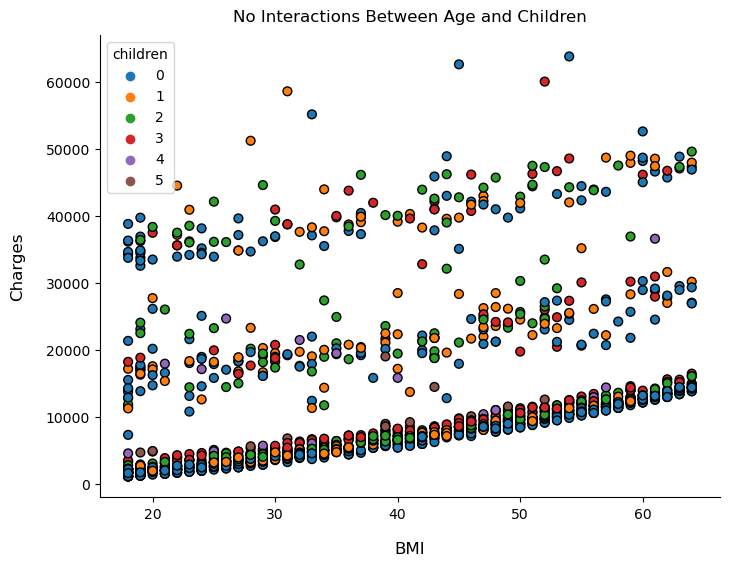

In [73]:
fig = plt.figure(figsize = (8,6))

ax = sns.scatterplot(
    x = df['age'],
    y = df['charges'],
    s = 40,
    edgecolor = 'black',
    linewidth = 1,
    hue = df['children']
)

for direction in ['top', 'right']:
    ax.spines[direction].set_visible(False)

ax.set_title('No Interactions Between Age and Children', pad = 10)
ax.set_ylabel('Charges', labelpad = 15)
ax.set_xlabel('BMI', labelpad = 15)

There doesn't seem to be any interactions between the two features

### Region

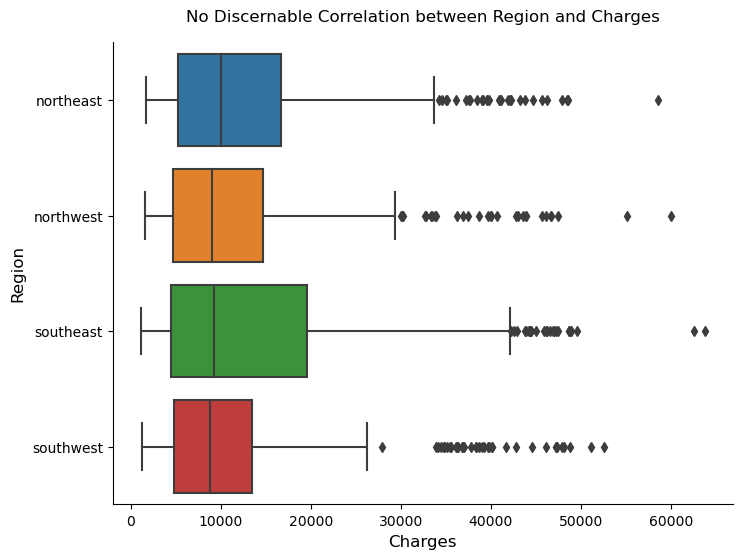

In [74]:
fig = plt.figure(figsize=(8,6))
ax = sns.boxplot(
    data = df,
    x = 'charges',
    y = 'region'
)

ax.set_title('No Discernable Correlation between Region and Charges', pad = 15)
ax.set_ylabel('Region')
ax.set_xlabel('Charges')

for dir in ['top','right']:
    ax.spines[dir].set_visible(False)

We can observe that the median charges across all regions is very similar. The southeast region seems to have the widest range with the highest 75% quartile value for charges of all other regions.  
This could be due to a number of reasons, we know that males have a wider range for charges than female patients so there could be a higher density of male patients in the southeast.  
Lets visualize this

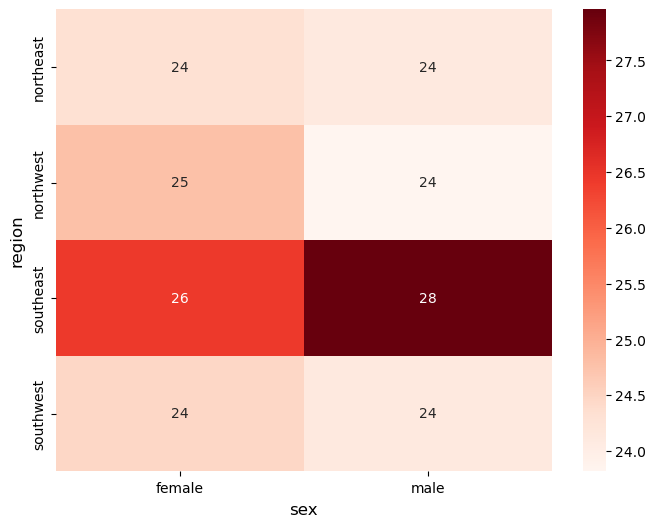

In [75]:
fig = plt.figure(figsize = (8,6))
cont_table = pd.crosstab(index = df['region'], columns = df['sex'],  normalize = 'columns') * 100
ax = sns.heatmap(data = cont_table, cmap = 'Reds', annot=True)

It appears from our contingency table that sure enough, 28% of our male patients come from the southeast which is 4% higher than all other regions in our dataset. This is likely a factor into the behavior of our region vs. charges plot above. We may want to include some interaction terms here between sex and region.

#### Smoker

In [ ]:
df['smoker'].unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

<AxesSubplot:xlabel='charges', ylabel='smoker'>

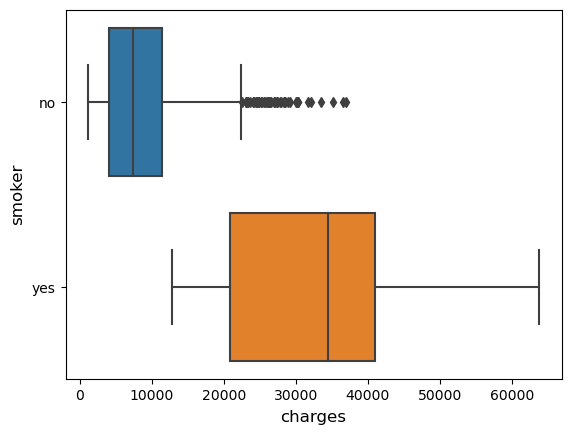

In [ ]:
sns.boxplot(
    data = df,
    x = 'charges',
    y = 'smoker'
)

We can see that charges and our smoker variable have a high correlation with eachother.  
Logically this follows and our model will likely be highly dependent on this features

### Our dependent variable

In [87]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Text(0.5, 1.0, 'Q-Q plot')

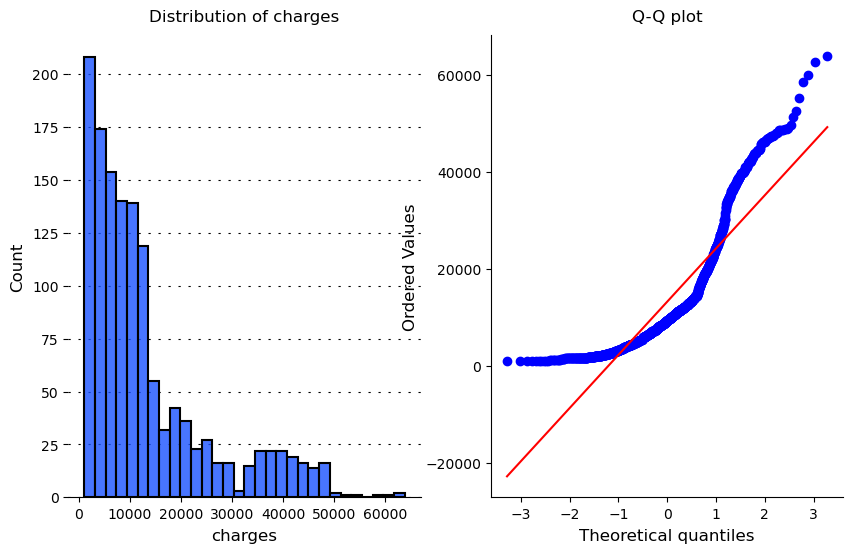

In [92]:
fig = plt.figure(figsize = (10,6), facecolor='white')
gs = fig.add_gridspec(1,2)
ax = [None for i in range(2)]
ax[0] = fig.add_subplot(gs[0,0])
ax[1] = fig.add_subplot(gs[0,1])

sns.histplot(
    data = df,
    x = 'charges',
    ax = ax[0],
    edgecolor = 'black',
    linewidth = 1.5,
    alpha = 0.8,
    zorder = 2,
    color = ['#1a53ff']
)

stats.probplot(df['charges'], dist = 'norm', plot = ax[1])

ax[0].grid(
    which = 'both',
    axis = 'y',
    zorder = 1,
    color = 'black',
    linestyle = '-',
    dashes = (2,7)
)

for direction in ['top', 'left', 'right']:
    ax[0].spines[direction].set_visible(False)

for direction in ['top', 'right']:
    ax[1].spines[direction].set_visible(False)

ax[0].set_title('Distribution of charges', pad = 10)
ax[1].set_title('Q-Q plot', pad = 10)

Our dependent feature, charges, seems to be heavily skewed right. The majorit of charges in our dataset are < 30k with an average of ~13k

We can do another quick box-cox transformation

In [95]:
transformed_charges, lambda_charges = stats.boxcox(df['charges'])
print('lambda value: ', lambda_charges)

lambda value:  0.043649053770664956


In [97]:
df['charges_transformed'] = transformed_charges

Text(0.5, 1.0, 'Q-Q plot')

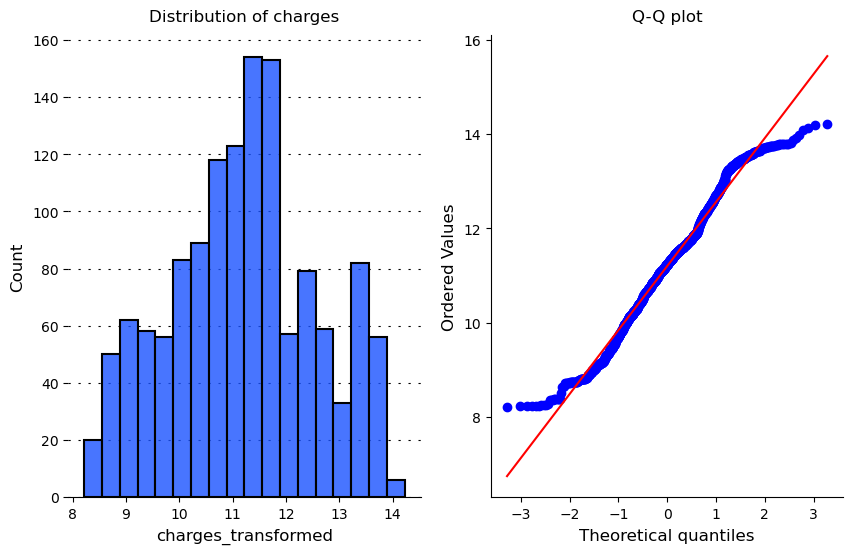

In [98]:
fig = plt.figure(figsize = (10,6), facecolor='white')
gs = fig.add_gridspec(1,2)
ax = [None for i in range(2)]
ax[0] = fig.add_subplot(gs[0,0])
ax[1] = fig.add_subplot(gs[0,1])

sns.histplot(
    data = df,
    x = 'charges_transformed',
    ax = ax[0],
    edgecolor = 'black',
    linewidth = 1.5,
    alpha = 0.8,
    zorder = 2,
    color = ['#1a53ff']
)

stats.probplot(df['charges_transformed'], dist = 'norm', plot = ax[1])

ax[0].grid(
    which = 'both',
    axis = 'y',
    zorder = 1,
    color = 'black',
    linestyle = '-',
    dashes = (2,7)
)

for direction in ['top', 'left', 'right']:
    ax[0].spines[direction].set_visible(False)

for direction in ['top', 'right']:
    ax[1].spines[direction].set_visible(False)

ax[0].set_title('Distribution of charges', pad = 10)
ax[1].set_title('Q-Q plot', pad = 10)

From our Q-Q plot we can see that our distribution is closer to normal now

### Exporting our cleaned dataframe 

In [99]:
df.to_csv('cleaned_data.csv', index = False)